In [14]:
import yfinance as yf
tesla_data = yf.Ticker("TSLA").history(period="max").reset_index()
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [34]:

gme_data = yf.Ticker("GME").history(period="max").reset_index()
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [16]:
pip install requests pandas beautifulsoup4


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [48]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO


url = 'https://finance.yahoo.com/quote/TSLA/financials?p=TSLA'


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


html_content = StringIO(str(soup))
tables = pd.read_html(html_content)


tesla_revenue = tables[0]


print(tesla_revenue.tail())



                                                   0
0  Will be right back... Thank you for your patie...


In [50]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO


url = 'https://finance.yahoo.com/quote/GME/financials?p=GME'


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


html_content = StringIO(str(soup))
tables = pd.read_html(html_content)


gme_revenue = tables[0]


gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)


gme_revenue.dropna(inplace=True)


gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]


print(gme_revenue.tail())


<>:21: SyntaxWarning: invalid escape sequence '\$'
<>:21: SyntaxWarning: invalid escape sequence '\$'
/var/folders/88/cv10sc2j3t3849m762s6kglm0000gn/T/ipykernel_2872/1945378987.py:21: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)
/var/folders/88/cv10sc2j3t3849m762s6kglm0000gn/T/ipykernel_2872/1945378987.py:21: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)


KeyError: 'Revenue'

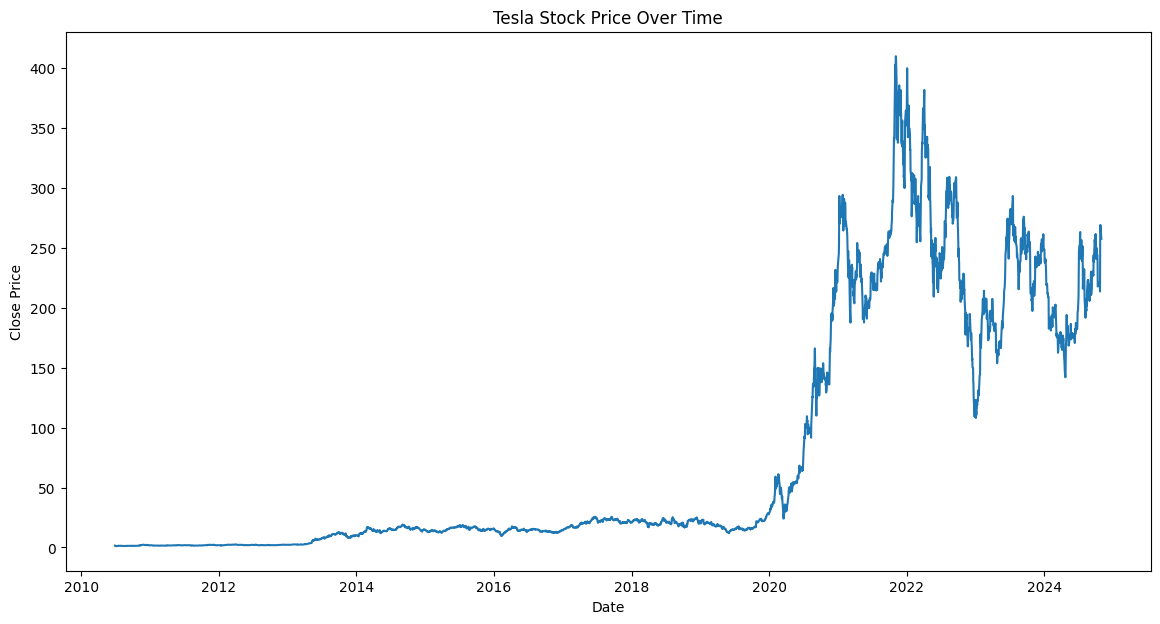

In [36]:
import matplotlib.pyplot as plt


def make_graph(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()


make_graph(tesla_data, "Tesla Stock Price Over Time")


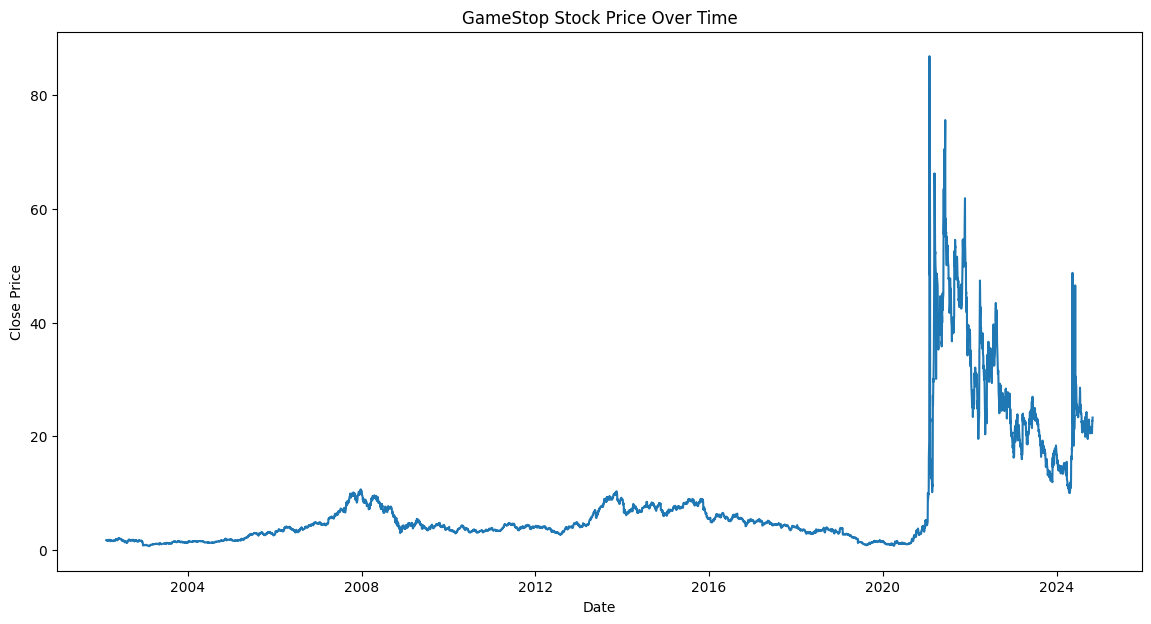

In [40]:
make_graph(gme_data, "GameStop Stock Price Over Time")
